<a href="https://colab.research.google.com/github/ismailsangu/IE423-TASK/blob/main/notebooks/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Current value of football player:

## Initialize

In [23]:
import pandas as pd
import numpy as np

## Load Data

In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
dfValue = pd.read_csv('/content/drive/MyDrive/Data_Sets/final_data.csv')

In [26]:
dfValue.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

## Select Data

### Select a prediction "Target"
The column we want to predict is called the prediction **target**. By convention, the prediction target is called y. In our case, we want to predict current value.

In [27]:
y = dfValue.loc[:,['current_value']]

### Choose "Features"
The columns that are input into our model (and later used to make predictions) are called **features**. In our case, those would be the columns used to determine the current value.

In [28]:
X = dfValue.loc[:,['age', 'goals', 'minutes played', 'award', 'highest_value']]

In [29]:
# View top few rows
X.head()

,age,goals,minutes played,award,highest_value
0,32.0,0.000000,9390,13,70000000
1,30.0,0.000000,1304,1,22000000
2,37.0,0.000000,292,4,6000000
3,25.0,0.028090,6408,9,50000000
4,30.0,0.017889,5031,21,80000000


In [30]:
# Describe columns using basic stats
X.describe()

,age,goals,minutes played,award,highest_value
count,10754.000000,10754.000000,10754.000000,10754.000000,1.075400e+04
mean,26.041903,0.125554,2470.789381,1.960759,6.152606e+06
std,4.777629,0.235585,2021.703271,3.743936,1.338988e+07
min,15.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,22.000000,0.000000,660.000000,0.000000,4.500000e+05
50%,26.000000,0.045969,2101.500000,1.000000,1.500000e+06
75%,29.000000,0.172263,3968.000000,2.000000,5.000000e+06
max,43.000000,11.250000,9510.000000,92.000000,2.000000e+08


## Build Model

The steps to building and using a model are:

* **Define:** Define the appropriate model to use. Depending on the model choice, other parameters are specified too.
* **Fit:** Fit the model to the data by capturing patterns.
* **Predict:** Predict other data points using the fitted model.
* **Evaluate:** Evaluate the model's prediction.

We will use the sklearn library to create our models.

#### Define

In [31]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

# Fix the seed to the random number generator to ensure same results each run.
mdlDtrValue  = DecisionTreeRegressor(random_state=1)

#### Fit

In [32]:
mdlDtrValue.fit(X,y)

DecisionTreeRegressor(random_state=1)

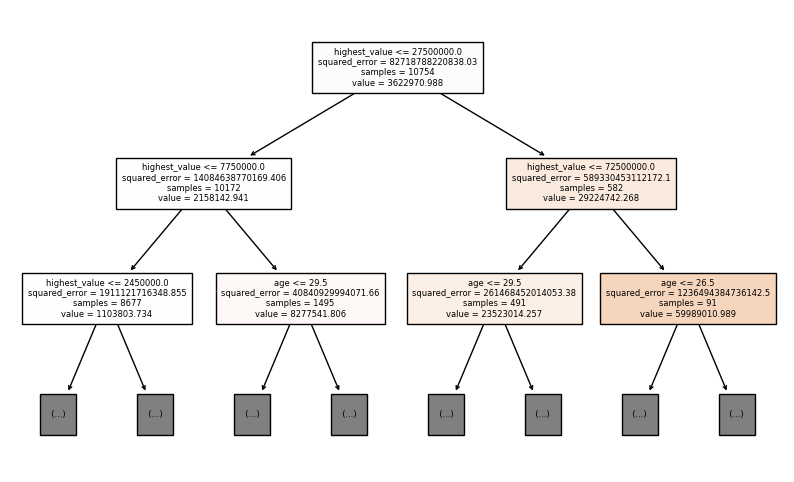

In [33]:
# Show model
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6), dpi=100)
plot_tree(mdlDtrValue, max_depth=2, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

We now have a fitted model that we can use to make predictions.

In practice, we'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the "Training Data" to see how the predict function works.

#### Predict

In [34]:
print('First few players:')
print(X.head())
print('Current value predictions:')
print(mdlDtrValue.predict(X.head()))

First few players:
    age     goals  minutes played  award  highest_value
0  32.0  0.000000            9390     13       70000000
1  30.0  0.000000            1304      1       22000000
2  37.0  0.000000             292      4        6000000
3  25.0  0.028090            6408      9       50000000
4  30.0  0.017889            5031     21       80000000
Current value predictions:
[15000000.  1500000.   600000. 50000000. 40000000.]


In [35]:
y.head()

,current_value
0,15000000
1,1500000
2,600000
3,50000000
4,40000000


#### Evaluate
There are many metrics for summarizing model quality, but we'll start with one called Mean Absolute Error (also called MAE).

In [36]:
from sklearn.metrics import mean_absolute_error

y_pred = mdlDtrValue.predict(X)
print('MAE:')
print(mean_absolute_error(y,y_pred))

MAE:
623.968134545594


Hold on... We just "Trained" and "Tested" the model on the same data.  This is called an in-sample score, but it doesn't reflect the fact that we want to make predictions on future data based on past data.  What we really want is an out-of-sample score.  For this, we will split the data into a **Training set** and a **Test set** so that we can build the model on the Training data set and validate the model on the Test data set.

In [37]:
from sklearn.model_selection import train_test_split

# Split features and target into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=1)

In [38]:
# Rebuild model
mdlDtrValueSpl = DecisionTreeRegressor(random_state=1)
mdlDtrValueSpl.fit(X_train, y_train)

# Predict test data
y_test_pred = mdlDtrValueSpl.predict(X_test)

# Evaluate test data actual vs prediction
print('MAE (after train-test-split):')
print(mean_absolute_error(y_test,y_test_pred))

MAE (after train-test-split):
1312371.9910635878


So, the in-sample model was only \$624 off from the mean on average whereas the out-of-sample model was a whopping \$1312372 off from the mean. To improve this, we would need to tweak the model or try a different model type.

utexas_ds_orie_divider_gray.png

## Improve Decision Tree Model
There are many settings in a Decision Tree model that we can tweak.  The most important one is the tree's depth.  Let's see what happens when we tweak the max_leaf_nodes in the Decision Tree model.

In [39]:
# Function to build and return MAE for a given number of max_leaf_nodes
def get_mae(mx_lf_nds, X_trn, X_tst, y_trn, y_tst):
    mdlDtrValueDpt = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)
    mdlDtrValueDpt.fit(X_trn,y_trn)
    y_tst_prd = mdlDtrValueDpt.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(mae)

In [40]:
# Iterate over a list of max_leaf_nodes to determine MAE across all
for i in [5, 50, 500, 50000]:
    mae = get_mae(i, X_train, X_test, y_train, y_test)
    print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  2478649.7854967955
Max leaf nodes:  50 	 Mean Absolute Error:  1300252.500634925
Max leaf nodes:  500 	 Mean Absolute Error:  1256439.830574407
Max leaf nodes:  50000 	 Mean Absolute Error:  1301795.5150059403


The best depth of the tree is at 500 max leaf nodes.

## Build Ensemble Random Forest Model
While the Decision Tree is simple, it is also not the most accurate because only a single tree is created and all future data points have to traverse the same tree.  What if we could generate more trees?

In [41]:
from sklearn.ensemble import RandomForestRegressor

# Define random forest model
mdlRfsValue = RandomForestRegressor(random_state=1)

# Fit model
mdlRfsValue.fit(X_train, y_train)

# Predict
y_test_pred = mdlRfsValue.predict(X_test)

# Evaluate
print('MAE (Random Forest):')
print(mean_absolute_error(y_test,y_test_pred))

<ipython-input-41-87821fb44c32>:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  mdlRfsValue.fit(X_train, y_train)


MAE (Random Forest):
1020002.1882642955


#Model Comparision

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=1),
    'Random Forest': RandomForestRegressor(random_state=1)
}
maes=[]
for i in [5, 50, 500, 50000]:
    mae = get_mae(i, X_train, X_test, y_train, y_test)
    maes.append(mae)
print("Max lead nodes min MAE:", min(maes))


# Evaluate models
for name, model in models.items():
    model.fit(X_train, y_train.values.ravel())
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{name} MAE: {mae}')



Max lead nodes min MAE: 1256439.830574407
Linear Regression MAE: 2256147.386900416
Decision Tree MAE: 1312371.9910635878
Random Forest MAE: 1020002.1882642955


## Conclusion

By using decision tree models:
* Split the data into *Training* and *Test* sets to properly evaluate the model
* Balanced *Overfitting* and *Underfitting* via tweaking the depth of the Decision Tree
* First decision tree created
* Decision tree model improved by max leaf nodes
* Ensembled many decision trees using the *Random Forest* model
* Random Forest model gives best result by giving minimum MAE.

utexas_ds_orie_divider_gray.png